In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/yf-auto/anaconda3/envs/lfytorch/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


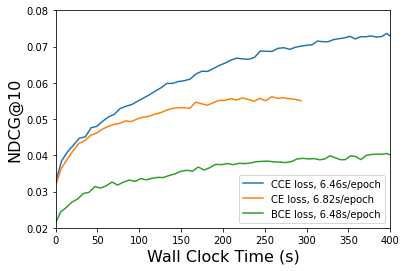

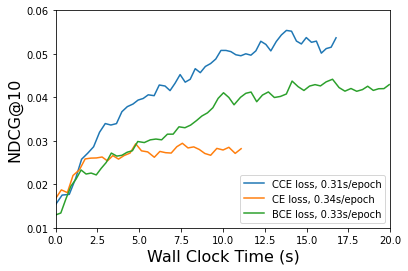

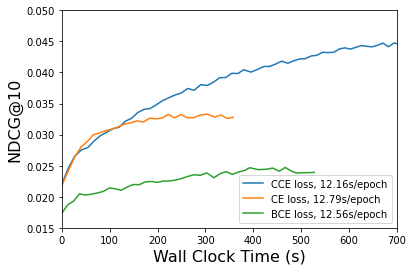

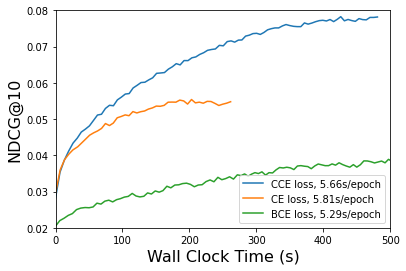

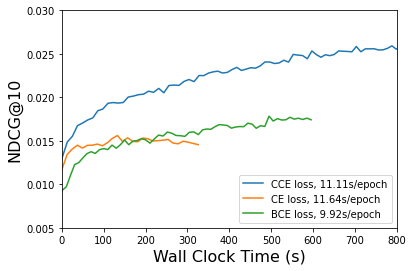

In [4]:
dataset_name = ['Beauty','LastFM','Sports_and_Outdoors','Toys_and_Games','Yelp']
for name in dataset_name:
    metric = "NDCG@10"
    dataset1 = name
    if name == "Sports_and_Outdoors":
        dataset = "Sports"
    elif name == "Toys_and_Games":
        dataset = 'Toys'
    else:
        dataset = name
    #model = "SASRec/"  #if model is SASRec as "".
    #model = "GRU4Rec/"
    model = "S3Rec/"
    
    if model == "SASRec/":
        model = ""
        ce = pd.read_csv('final_result/RQ2_data/' + dataset +'/CE/run-'+ dataset1 +'_log_tensorboard_CE_metric_'+ metric +'-tag-metric.csv')
        ceft = pd.read_csv('final_result/RQ2_data/'+ dataset +'/CE_ALL/run-'+ dataset1 +'_log_tensorboard_CE_ALL_metric_'+ metric +'-tag-metric.csv')
        bceft = pd.read_csv('final_result/RQ2_data/'+ dataset +'/Pointwise_BCE/run-'+ dataset1 +'_log_tensorboard_PointwiseCE_metric_'+ metric +'-tag-metric.csv')
    else:
        ce = pd.read_csv('final_result/RQ2_data/'+ model + dataset +'/CE/run-'+ dataset1 +'_log_tensorboard_CE_metric_'+ metric +'-tag-metric.csv')
        ceft = pd.read_csv('final_result/RQ2_data/'+ model + dataset +'/CE_ALL/run-'+ dataset1 +'_log_tensorboard_CE_ALL_metric_'+ metric +'-tag-metric.csv')
        bceft = pd.read_csv('final_result/RQ2_data/'+ model + dataset +'/Pointwise_BCE/run-'+ dataset1 +'_log_tensorboard_PointwiseCE_metric_'+ metric +'-tag-metric.csv')
    
    ce['Wall time'] = ce['Wall time'] - ce['Wall time'][0] 
    ceft['Wall time'] = ceft['Wall time'] - ceft['Wall time'][0] 
    bceft['Wall time'] = bceft['Wall time'] - bceft['Wall time'][0] 

    col = ce.columns

    wall_time = [ceft[col[0]], ce[col[0]], bceft[col[0]]]
    avg = [] #epoch avg time
    for i in wall_time:
        num = i.shape[0]
        avg.append(round(i[num-1]/num,2))

    # SASRec
    color = 'whitesmoke'
    fig = plt.figure()
    #fig = plt.figure(facecolor=color)
    ax = fig.add_subplot(111)
    #ax.patch.set_facecolor(color)
    
    if model == '':
        if dataset == 'Beauty':
            plt.xlim(0,400)
            plt.ylim(0.01,0.08)
        elif dataset == "LastFM":
            plt.xlim(0,30)
            plt.ylim(0,0.05)
        elif dataset == "Yelp":
            plt.xlim(0,250)
            plt.ylim(0,0.03)
        elif dataset == "Sports":
            plt.xlim(0,500)
            plt.ylim(0.005,0.04)
        elif dataset == "Toys":
            plt.xlim(0,300)
            plt.ylim(0.005,0.08)
    elif model == 'GRU4Rec/':
        if dataset == "Beauty":   
            plt.xlim(0,400)
            plt.ylim(0,0.06)
        elif dataset == "LastFM":   
            plt.xlim(0,7)
            plt.ylim(0,0.03)
        elif dataset == "Yelp":   
            plt.xlim(0,300)
            plt.ylim(0,0.025)
        elif dataset == "Sports":   
            plt.xlim(0,300)
            plt.ylim(0,0.03)
        elif dataset == "Toys":   
            plt.xlim(0,500)
            plt.ylim(0,0.05)
    elif model == "S3Rec/":   
        if dataset == "Beauty":   
            plt.xlim(0,400)
            plt.ylim(0.02,0.08)
        elif dataset == "LastFM":   
            plt.xlim(0,20)
            plt.ylim(0.01,0.06)
        elif dataset == "Yelp":   
            plt.xlim(0,800)
            plt.ylim(0.005,0.03)
        elif dataset == "Sports":   
            plt.xlim(0,700)
            plt.ylim(0.015,0.05)
        elif dataset == "Toys":   
            plt.xlim(0,500)
            plt.ylim(0.02,0.08)
            
    a,=plt.plot(ceft[col[0]],ceft[col[-1]])
    b,=plt.plot(ce[col[0]],ce[col[-1]])
    c,=plt.plot(bceft[col[0]],bceft[col[-1]])

    labels,name=[],['CCE loss','CE loss','BCE loss']
    for i in range(len(avg)):
        labels.append(name[i]+', '+str(avg[i])+'s/epoch')

    plt.legend([a,b,c],labels=labels,loc='lower right')
    plt.ylabel(metric,fontsize=16)
    plt.xlabel("Wall Clock Time (s)",fontsize=16)
    #plt.grid()

    #plt.savefig('myfigresult/a_'+ model[:-1] + dataset +'.svg')

/home/yf-auto/anaconda3/envs/lfytorch/lib/python3.7/site-packages/ipykernel_launcher.py:102: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


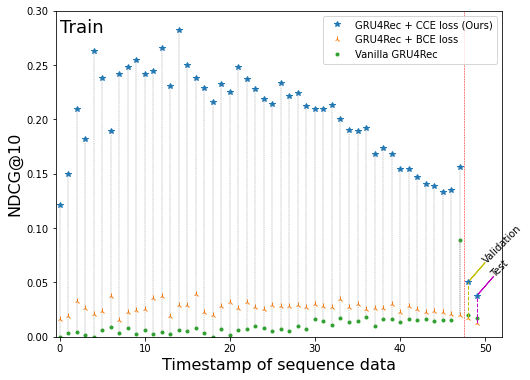

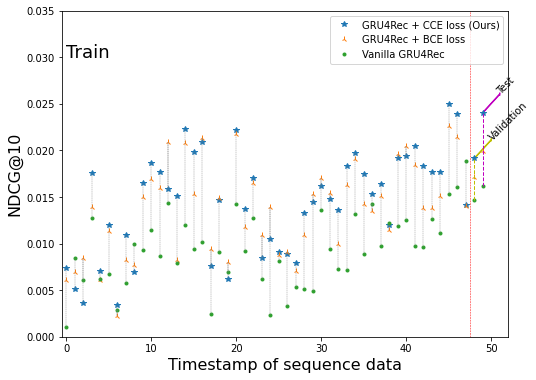

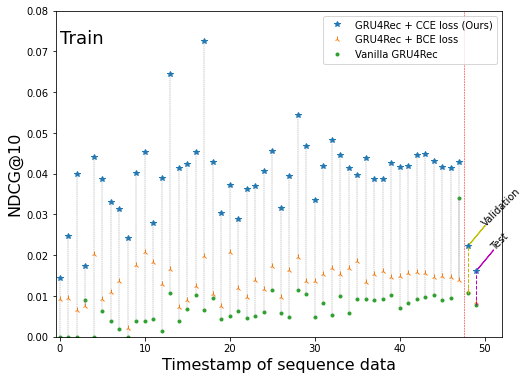

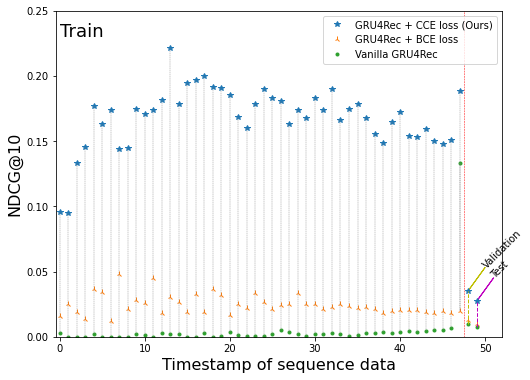

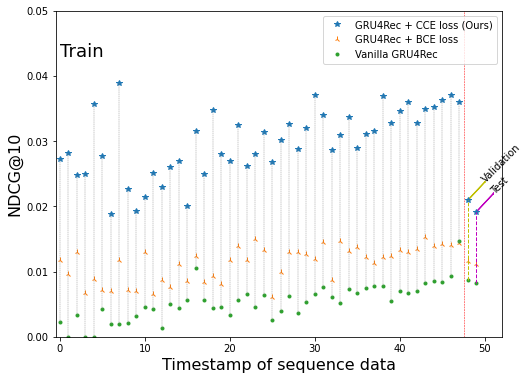

In [2]:
dataset_name = ['Beauty','LastFM','Sports_and_Outdoors','Toys_and_Games','Yelp']

for name in dataset_name:
    data_name = name
    ce = pd.read_csv(f"final_result/{data_name}_CE_result.csv")
    bceft = pd.read_csv(f"final_result/{data_name}_BCE_result.csv")
    ceft = pd.read_csv(f"final_result/{data_name}_CCE_result.csv")
    col = ce.columns

    # S3Rec
    color = 'whitesmoke'
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    # fig = plt.figure(facecolor=color,figsize=(8,6))
    # ax = fig.add_subplot(111)
    # ax.patch.set_facecolor(color)

    x = list(range(50))
    tag = 'metric'
    a,=plt.plot(x,ceft[tag],'*')
    b,=plt.plot(x,bceft[tag],'2')
    c,=plt.plot(x,ce[tag],'.')

    for i in range(50):
        if i <48:
            plt.plot([x[i]]*3,[ce[tag].iloc[i], bceft[tag].iloc[i], ceft[tag].iloc[i]], color='gray', ls='--', lw=0.4)
        elif i == 48:
            plt.plot([x[i]]*3,[ce[tag].iloc[i], bceft[tag].iloc[i], ceft[tag].iloc[i]], color='y', ls='--', lw=1)
        else:
            plt.plot([x[i]]*3,[ce[tag].iloc[i], bceft[tag].iloc[i], ceft[tag].iloc[i]], color='m', ls='--', lw=1)

    if data_name == "Beauty":
        plt.xlim(-0.5,52)
        plt.ylim(0,0.3)
        plt.plot([47.5]*50, [i/(0.3/50) for i in range(50)], color='red', ls='--', lw=0.5)

        plt.text(0,0.28,'Train', fontsize=18)

        dx,dy = 2, 0.018
        plt.arrow(48,ceft[tag].iloc[-2],dx,dy, width=0.0001, color='y')
        plt.text(50-0.5,ceft[tag].iloc[-2]+dy,'Validation', fontsize=10, rotation='45')

        plt.arrow(49,ceft[tag].iloc[-1],dx,dy, width=0.0001, color='m')
        plt.text(51-0.5,ceft[tag].iloc[-1]+dy,'Test', fontsize=10, rotation='45')
    elif data_name == "LastFM":
        plt.xlim(-0.5,52)
        plt.ylim(0,0.035)
        plt.plot([47.5]*50, [i/(0.035/50) for i in range(50)], color='red', ls='--', lw=0.5)

        plt.text(0,0.030,'Train', fontsize=18)

        dx,dy = 2, 0.002
        plt.arrow(48,ceft[tag].iloc[-2],dx,dy, width=0.0001, color='y')
        plt.text(50-0.5,ceft[tag].iloc[-2]+dy,'Validation', fontsize=10, rotation='45')

        plt.arrow(49,ceft[tag].iloc[-1],dx,dy, width=0.0001, color='m')
        plt.text(51-0.5,ceft[tag].iloc[-1]+dy,'Test', fontsize=10, rotation='45')    
    elif data_name == "Yelp":
        plt.xlim(-0.5,52)
        plt.ylim(0,0.05)

        plt.plot([47.5]*50, [i/833 for i in range(50)], color='red', ls='--', lw=0.5)

        plt.text(0,0.043,'Train', fontsize=18)

        dx,dy = 2, 0.0028
        plt.arrow(48,ceft[tag].iloc[-2],dx,dy, width=0.0001, color='y')
        plt.text(50-0.5,ceft[tag].iloc[-2]+dy,'Validation', fontsize=10, rotation='45')

        plt.arrow(49,ceft[tag].iloc[-1],dx,dy, width=0.0001, color='m')
        plt.text(51-0.5,ceft[tag].iloc[-1]+dy,'Test', fontsize=10, rotation='45')
    elif data_name == "Sports_and_Outdoors":
        plt.xlim(-0.5,52)
        plt.ylim(0,0.08)
        plt.plot([47.5]*50, [i/(0.08/50) for i in range(50)], color='red', ls='--', lw=0.5)

        plt.text(0,0.072, 'Train', fontsize=18)

        dx,dy = 2, 0.005
        plt.arrow(48,ceft[tag].iloc[-2],dx,dy, width=0.0001, color='y')
        plt.text(50-0.5,ceft[tag].iloc[-2]+dy,'Validation', fontsize=10, rotation='45')

        plt.arrow(49,ceft[tag].iloc[-1],dx,dy, width=0.0001, color='m')
        plt.text(51-0.5,ceft[tag].iloc[-1]+dy,'Test', fontsize=10, rotation='45')    
    elif data_name == "Toys_and_Games":
        plt.xlim(-0.5,52)
        plt.ylim(0,0.25)
        plt.plot([47.5]*50, [i/(0.25/50) for i in range(50)], color='red', ls='--', lw=0.5)

        plt.text(0,0.23,'Train', fontsize=18)

        dx,dy = 2, 0.018
        plt.arrow(48,ceft[tag].iloc[-2],dx,dy, width=0.0001, color='y')
        plt.text(50-0.5,ceft[tag].iloc[-2]+dy,'Validation', fontsize=10, rotation='45')

        plt.arrow(49,ceft[tag].iloc[-1],dx,dy, width=0.0001, color='m')
        plt.text(51-0.5,ceft[tag].iloc[-1]+dy,'Test', fontsize=10, rotation='45')    


    name=['GRU4Rec + CCE loss (Ours)','GRU4Rec + BCE loss', 'Vanilla GRU4Rec']
    plt.legend([a,b,c],labels=name,loc='upper right')
    plt.ylabel("NDCG@10",fontsize = 16)
    plt.xlabel("Timestamp of sequence data", fontsize = 16)
    
    # if data_name == "Yelp":
    #     plt.title(f"GRU4Rec with {data_name} dataset")
    # plt.savefig(f'myfigresult/RQ3_GRU4Rec_{data_name}_introduce.svg')
    #plt.savefig(f'figresult/a_RQ3_GRU4Rec_{data_name}.svg')